Twitter Anaylsis - CSV Tables

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import glob

In [ ]:
#data files
#Twitter_API_Table = "csv_output/Twitter_API_Table1.csv"
#Twitter_API_Table2 = "csv_output/Twitter_API_Table2.csv"

#read files
#Twitter_API_Table  = pd.read_csv(Twitter_API_Table)
#Twitter_API_Table2 = pd.read_csv(Twitter_API_Table2)

#Add blank column to merge data
#Twitter_API_Table["Column"] = ""
#Twitter_API_Table2 ["Column"] = ""

In [2]:
csv_file_list = ['csv_output/Twitter_API_Table1.csv','csv_output/Twitter_API_Table2.csv']

list_of_dataframes = []
for filename in csv_file_list:
    list_of_dataframes.append(pd.read_csv(filename))

merged_df = pd.concat(list_of_dataframes)

merged_df.head()

,Unnamed: 0,id,author_id,lang,text,title,created_at,url,source,normalized_text,...,tag 2,tag 3,tag 4,Mentions Total,retweet count,reply count,like count,quote count,possibly_sensitive,tag 5
0,0,1453472698349326338,197257623,en,RT @FortuneMagazine: MTN is making its network...,NaN,2021-10-27T21:24:30.000Z,NaN,Twitter for Android,MTN,...,NaN,NaN,NaN,1,18,0,0,0,True,NaN
1,1,1453472665193394189,1318432664496623616,en,Amazon​.de: AMD Ryzen 9 5950X Box\n🔗 https://t...,AMD Ryzen 9 5950X Box,2021-10-27T21:24:22.000Z,https://t.co/q3rMN5ihRx,Twitter,NaN,...,partalert,pa_ryzen5950x,NaN,0,0,0,0,0,False,NaN
2,2,1453472656682991617,1018893163925331968,en,RT @TeamSChandna: Watch #SurbhiChandna's new #...,NaN,2021-10-27T21:24:20.000Z,NaN,Twitter Web App,Vitamin C Face Serum,...,Ad,RoseAndGold,NaN,2,29,0,0,0,False,NaN
3,3,1453472634319122433,705402063728017408,en,Gardenrooms and sheds to read your books.. #ga...,Rowlinson Easy Fix Spiked Border Roll 1.8m - P...,2021-10-27T21:24:14.000Z,https://t.co/tur73NW2bY,Twitter,NaN,...,ad,shed,NaN,0,0,0,0,0,False,NaN
4,4,1453472610553974786,3889570332,en,RT @studiosounds: #Listen to Dayne S - Moments...,Moments - EP by Dayne S,2021-10-27T21:24:09.000Z,https://t.co/NpunFEBHiR,Twitter Web App,Dayne S,...,Dance,AD,NaN,1,1,0,0,0,True,NaN


In [3]:
merged_total_df = merged_df.drop(['Unnamed: 0'], axis=1)
merged_total_df

,id,author_id,lang,text,title,created_at,url,source,normalized_text,type,...,tag 2,tag 3,tag 4,Mentions Total,retweet count,reply count,like count,quote count,possibly_sensitive,tag 5
0,1453472698349326338,197257623,en,RT @FortuneMagazine: MTN is making its network...,NaN,2021-10-27T21:24:30.000Z,NaN,Twitter for Android,MTN,Organization,...,NaN,NaN,NaN,1,18,0,0,0,True,NaN
1,1453472665193394189,1318432664496623616,en,Amazon​.de: AMD Ryzen 9 5950X Box\n🔗 https://t...,AMD Ryzen 9 5950X Box,2021-10-27T21:24:22.000Z,https://t.co/q3rMN5ihRx,Twitter,NaN,NaN,...,partalert,pa_ryzen5950x,NaN,0,0,0,0,0,False,NaN
2,1453472656682991617,1018893163925331968,en,RT @TeamSChandna: Watch #SurbhiChandna's new #...,NaN,2021-10-27T21:24:20.000Z,NaN,Twitter Web App,Vitamin C Face Serum,Product,...,Ad,RoseAndGold,NaN,2,29,0,0,0,False,NaN
3,1453472634319122433,705402063728017408,en,Gardenrooms and sheds to read your books.. #ga...,Rowlinson Easy Fix Spiked Border Roll 1.8m - P...,2021-10-27T21:24:14.000Z,https://t.co/tur73NW2bY,Twitter,NaN,NaN,...,ad,shed,NaN,0,0,0,0,0,False,NaN
4,1453472610553974786,3889570332,en,RT @studiosounds: #Listen to Dayne S - Moments...,Moments - EP by Dayne S,2021-10-27T21:24:09.000Z,https://t.co/NpunFEBHiR,Twitter Web App,Dayne S,Person,...,Dance,AD,NaN,1,1,0,0,0,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,1453475917800607744,4846392425,en,RT @davelackie: I'm co-hosting the Beauty's Be...,NaN,2021-10-27T21:37:17.000Z,NaN,Twitter Web App,NaN,NaN,...,NaN,NaN,NaN,1,213,0,0,0,False,NaN
82,1453475885051482124,4846392425,en,RT @davelackie: Excited to be co-hosting the B...,NaN,2021-10-27T21:37:09.000Z,NaN,Twitter Web App,NaN,NaN,...,NaN,NaN,NaN,1,68,0,0,0,False,NaN
83,1453475881486192643,1122250512902934528,en,RT @falcodrin: 🔥 BESTBUY : XFX Radeon RX 6600 ...,NaN,2021-10-27T21:37:09.000Z,https://t.co/EHtgTkhpNI,Twitter for Android,XFX Radeon RX 6600 XT Speedster QICK308,Product,...,NaN,NaN,NaN,1,1,0,0,0,False,NaN
84,1453475866957139969,1349702570739183618,en,"Apple 13"" MacBook Air Silver | 1.6GHz i5 16GB ...",NaN,2021-10-27T21:37:05.000Z,https://t.co/Z4TSHkiPG6,dlvr.it,Apple 13,Product,...,refurbished,deals,NaN,0,0,0,0,0,False,NaN


In [4]:
# mini df
mini_tags = pd.DataFrame(merged_total_df[['tag 1', 'tag 2', 'tag 3', 'tag 4', 'tag 5']])

# count number of tags per tweet
mini_tags['tag counts'] = mini_tags.count(axis =1)

# merge with retweets and likes
retweets_df = pd.DataFrame(merged_total_df['retweet count'])
likes_df = pd.DataFrame(merged_total_df['like count'])

# fake column to merge
mini_tags['merge'] = "NaN"
retweets_df['merge'] = "NaN"
likes_df['merge'] = "NaN"

# merging
mini_merged = pd.merge(mini_tags, retweets_df, on='merge', how='outer')
mini_merged = pd.merge(mini_merged, likes_df, on='merge', how='outer')

# delete fake column
del mini_merged['merge']
mini_merged.head()

,tag 1,tag 2,tag 3,tag 4,tag 5,tag counts,retweet count,like count
0,ad,NaN,NaN,NaN,NaN,1,18,0
1,ad,NaN,NaN,NaN,NaN,1,18,0
2,ad,NaN,NaN,NaN,NaN,1,18,0
3,ad,NaN,NaN,NaN,NaN,1,18,0
4,ad,NaN,NaN,NaN,NaN,1,18,0


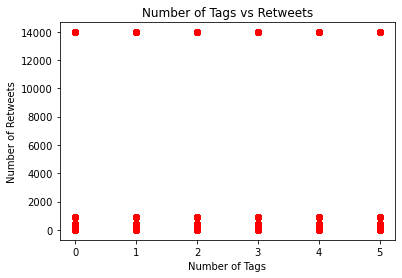

In [16]:
# is there a correlation between tag counts and retweet count?
x_axis = mini_merged['tag counts']
y_axis = mini_merged['retweet count']
plt.scatter(x_axis, y_axis, facecolors="red")

plt.xlabel("Number of Tags")
plt.ylabel("Number of Retweets")
plt.title("Number of Tags vs Retweets")
# plt.tight_layout()
plt.savefig("tags_vs_retweets.png")

In [20]:
st.pearsonr(x_axis, y_axis)

(1.1528965445078282e-16, 0.999892488595311)

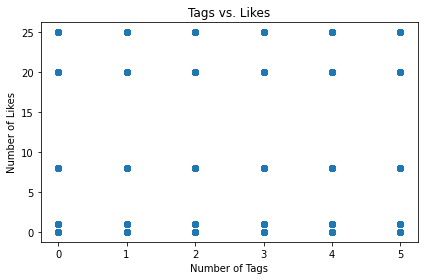

In [17]:
# is there a correlation between tags and likes?
x_axis = mini_merged['tag counts']
y_axis = mini_merged['like count']
plt.scatter(x_axis, y_axis)

plt.xlabel("Number of Tags")
plt.ylabel("Number of Likes")
plt.title("Tags vs. Likes")
plt.tight_layout()
plt.savefig("tags_vs_likes.png")

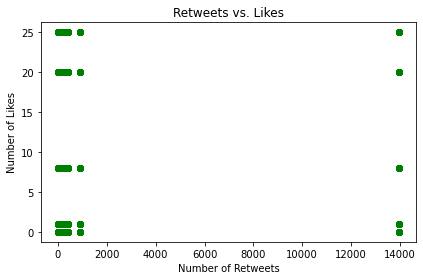

In [21]:
# is there a correlation between retweets and likes?
plt.scatter(mini_merged['retweet count'], mini_merged['like count'], facecolors="green")
plt.xlabel("Number of Retweets")
plt.ylabel("Number of Likes")
plt.title("Retweets vs. Likes")
plt.tight_layout()
plt.savefig("retweets_vs_likes.png")

In [ ]:
merged_total_df.to_csv('csv_output/Twitter_API_Merged_Table.csv')